### Coordinate Transforms

- [Cartesian to Cartesian](#Cartesian-to-Cartesian)
- [Angular to Cartesian](#Angular-to-Cartesian)
- [Cartesian to Angular](#Cartesian-to-Angular)

#### Astropy Coordinate Transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql

from astropy import units as u
from astropy.coordinates import SkyCoord

% matplotlib inline

In [2]:
c = SkyCoord(ra=200*u.degree, dec=0*u.degree, distance=1*u.au)

In [3]:
%%timeit 
c.barycentrictrueecliptic

6.83 ms ± 896 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
c.barycentrictrueecliptic

<SkyCoord (BarycentricTrueEcliptic: equinox=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    (198.46603218, 7.81921589, 1.)>

In [5]:
%%timeit 
c.heliocentrictrueecliptic

6.58 ms ± 655 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
c.heliocentrictrueecliptic

<SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    (198.44322226, 7.86754967, 0.99238902)>

### In-House Coordinate Transforms

In [7]:
OBLIQUITY = np.radians(23.43928)
TRANSFORM_EQ2EC = np.matrix([[1, 0 , 0],
                             [0,  np.cos(OBLIQUITY), np.sin(OBLIQUITY)],
                             [0, -np.sin(OBLIQUITY), np.cos(OBLIQUITY)]])
TRANSFORM_EC2EQ = np.matrix([[1, 0 , 0],
                             [0, np.cos(OBLIQUITY), -np.sin(OBLIQUITY)],
                             [0, np.sin(OBLIQUITY),  np.cos(OBLIQUITY)]])

x_axis = np.array([1, 0, 0])
y_axis = np.array([0, 1, 0])
z_axis = np.array([0, 0, 1])
axes = np.vstack([x_axis, y_axis, z_axis])

In [8]:
axes

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### Sample Input

In [10]:
con = sql.connect("../data/objects.db")
data = pd.read_sql("""SELECT * FROM ephemeris WHERE night = 59584 LIMIT 10000""", con)
coords_ec_cart = data[['HEclObj_X_au', 'HEclObj_Y_au', 'HEclObj_Z_au']].as_matrix()
coords_eq_ang_deg = data[["RA_deg", "Dec_deg"]].as_matrix()

astropy_eq_ang = SkyCoord(ra=coords_eq_ang_deg[:,0]*u.degree, dec=coords_eq_ang_deg[:,1]*u.degree, frame="gcrs")
astropy_ec_cart = SkyCoord(x=coords_ec_cart[:,0],
                           y=coords_ec_cart[:,1],
                           z=coords_ec_cart[:,2],
                           representation_type='cartesian',
                           unit=u.au,
                           frame="icrs")

In [11]:
data

,obsId,designation,code,mjd_utc,night,Delta_au,RA_deg,Dec_deg,dDelta/dt_au_p_day,dRA/dt_deg_p_day,...,HEclObj_Z_au,HEclObj_dX/dt_au_p_day,HEclObj_dY/dt_au_p_day,HEclObj_dZ/dt_au_p_day,HEclObsy_X_au,HEclObsy_Y_au,HEclObsy_Z_au,EccAnom,TrueAnom,PosAngle_deg
0,5,00001,I11,59584.173,59584,1.937727,56.743590,18.148629,0.009249,-0.088582,...,-0.058796,-0.010121,0.002207,0.001935,-0.245982,0.952101,-0.000077,283.580777,279.328011,297.964336
1,36,00002,I11,59584.173,59584,3.230168,351.146516,-11.745166,0.011133,0.265449,...,-0.409735,-0.003591,0.007643,-0.004980,-0.245982,0.952101,-0.000077,256.086206,243.492737,80.406555
2,67,00003,I11,59584.173,59584,3.932799,289.093727,-13.731128,-0.001023,0.388385,...,0.579505,0.007865,0.004961,-0.001446,-0.245982,0.952101,-0.000077,243.354478,230.767543,85.269684
3,98,00004,I11,59584.173,59584,3.064566,266.276479,-21.232476,-0.003629,0.539466,...,0.115531,0.011886,-0.002574,-0.001369,-0.245982,0.952101,-0.000077,1.978728,2.163710,93.944752
4,129,00005,I11,59584.173,59584,3.976257,301.642653,-19.031186,0.004517,0.368884,...,0.083255,0.007640,0.004558,-0.000782,-0.245982,0.952101,-0.000077,160.089569,163.545244,79.907148
5,160,00006,I11,59584.173,59584,2.511752,334.919644,-17.275019,0.007004,0.524378,...,-0.280004,0.000481,0.013100,-0.002670,-0.245982,0.952101,-0.000077,337.578695,332.634743,73.314402
6,191,00007,I11,59584.173,59584,1.093882,117.383787,15.550352,-0.000011,-0.276246,...,-0.103243,-0.012511,-0.002213,-0.001151,-0.245982,0.952101,-0.000077,53.083597,64.607283,267.807445
7,222,00008,I11,59584.173,59584,2.403534,203.448276,-3.755395,-0.012375,0.273806,...,0.235113,-0.001111,-0.010243,0.000484,-0.245982,0.952101,-0.000077,136.750840,142.611226,103.266417
8,253,00009,I11,59584.173,59584,3.568308,262.209436,-23.697373,-0.005170,0.419341,...,-0.028146,0.009475,-0.002511,-0.000951,-0.245982,0.952101,-0.000077,179.063203,179.171393,95.281113
9,284,00010,I11,59584.173,59584,3.015777,209.664912,-15.978204,-0.013975,0.279124,...,-0.190952,0.003283,-0.010104,0.000059,-0.245982,0.952101,-0.000077,322.154631,317.996720,113.265010


#### Cartesian to Cartesian

In [141]:
def equatorialToEclipticCartesian(coords_eq_cart):
    """
    Transform equatorial cartesian coordinates to ecliptic cartesian
    coordinates. 
    
    Parameters
    ----------
    coords_eq_cart : `~np.ndarray` (N, 3)
        Cartesian equatorial x, y, z coordinates.
        
    Returns
    -------
    coords_ec_cart : `~np.ndarray` (N, 3)
        Cartesian ecliptic x, y, z coordinates.
        
    See Also
    --------
    eclipticToEquatorialCartesian : Transform ecliptic cartesian coordinates 
        to equatorial cartesian coordinates. 
    """
    return np.array(TRANSFORM_EQ2EC @ coords_eq_cart.T).T
    
def eclipticToEquatorialCartesian(coords_ec_cart):
    """
    Transform ecliptic cartesian coordinates to equatorial cartesian
    coordinates. 
     
    
    Parameters
    ----------
    coords_ec_cart : `~np.ndarray` (N, 3)
        Cartesian ecliptic x, y, z coordinates.
     
    Returns
    -------
    coords_eq_cart : `~np.ndarray` (N, 3)
        Cartesian equatorial x, y, z coordinates.
        
    See Also
    --------
    equatorialToEclipticCartesian : Transform ecliptic cartesian coordinates 
        to equatorial cartesian coordinates. 
    """
    return np.array(TRANSFORM_EC2EQ @ coords_ec_cart.T).T

def test_eclipticEquatorialCartesianSymmetry():
    np.testing.assert_array_almost_equal(TRANSFORM_EC2EQ.T, eclipticToEquatorialCartesian(axes))
    np.testing.assert_array_almost_equal(TRANSFORM_EQ2EC.T, equatorialToEclipticCartesian(axes))
    
def test_eclipticEquatorialX():
    # Check that the x-axis for ecliptic and equatorial is the same
    np.testing.assert_array_almost_equal(equatorialToEclipticCartesian(axes[:,0]), eclipticToEquatorialCartesian(axes[:,0]))
    
test_eclipticEquatorialCartesianSymmetry()
test_eclipticEquatorialX()

In [82]:
equatorialAngularToCartesian(np.radians(coords_eq_ang_deg))

array([[ 0.52110548,  0.79462405,  0.31148305],
       [ 0.96739726, -0.15068581, -0.20355915],
       [ 0.31776562, -0.91797736, -0.23736594],
       ...,
       [-0.90670472, -0.37918388, -0.18467847],
       [ 0.94189021,  0.32092723,  0.09923982],
       [ 0.50265103, -0.84455268, -0.18458796]])

In [83]:
astropy_eq_ang.cartesian

<CartesianRepresentation (x, y, z) [dimensionless]
    [( 0.52110548,  0.79462405,  0.31148305),
     ( 0.96739726, -0.15068581, -0.20355915),
     ( 0.31776562, -0.91797736, -0.23736594), ...,
     (-0.90670472, -0.37918388, -0.18467847),
     ( 0.94189021,  0.32092723,  0.09923982),
     ( 0.50265103, -0.84455268, -0.18458796)]>

In [84]:
eclipticToEquatorialCartesian(coords_ec_cart)

array([[ 0.76377827,  2.41333107,  0.98222234],
       [ 2.87887402,  0.38682547, -0.27887687],
       [ 1.00372629, -2.73665469, -0.55485848],
       ...,
       [-2.35424459, -0.00810921, -0.05075932],
       [ 2.16309058,  1.69440182,  0.63247892],
       [ 1.24565198, -1.63267283, -0.16911718]])

In [85]:
astropy_ec_cart.heliocentrictrueecliptic

<SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    [( 71.97669483, -23.63394551, 2.71972919),
     (  1.26353626,  -9.30891115, 2.92523603),
     (293.97755681,  33.04258031, 2.96742431), ...,
     (180.9713989 ,  -0.70738001, 2.34762443),
     ( 36.7849712 , -16.5381045 , 2.82671351),
     (315.3713757 ,  31.43266852, 2.06308846)]>

In [105]:
eclipticCartesianToAngular(coords_ec_cart)

array([[ 1.28558138, -0.02165616,  2.71519518],
       [ 0.08454454, -0.14087691,  2.91810244],
       [ 5.06453096,  0.19656341,  2.96725687],
       ...,
       [ 3.15332877, -0.01840812,  2.3548057 ],
       [ 0.6957179 , -0.03324021,  2.8195723 ],
       [ 5.3845835 ,  0.2422386 ,  2.06055091]])

#### Angular to Cartesian

In [119]:
# Define cardinal axes in cartesian coordinates
x_axis = np.array([[1, 0, 0]])
y_axis = np.array([[0, 1, 0]]) 
z_axis = np.array([[0, 0, 1]]) 

# Define cardinal axes in angular coordinates
x_axis_ang = np.array([[0, 0, 1]])
neg_x_axis_ang = np.array([[np.pi, 0, 1]])
y_axis_ang = np.array([[np.pi/2, 0, 1]]) 
neg_y_axis_ang = np.array([[3*np.pi/2, 0, 1]]) 
z_axis_ang = np.array([[0, np.pi/2, 1]]) 
neg_z_axis_ang = np.array([[0, -np.pi/2, 1]]) 


In [125]:
def _angularToCartesian(phi, theta, r):
    """
    Converts angular coordinates to cartesian given
    an angle or angles of longitude (phi), an angle or angles of latitude (theta),
    and distance (r). 
    
    Parameters
    ----------
    phi : `~np.ndarray` (N)
        Longitude in radians.
    theta : `~np.ndarray` (N)
        Latitude in radians. 
    r : float or `~np.ndarray` (N)
        Radial distance in arbitrary units.
        
    Returns
    -------
    x, y, z: `~np.ndarray` (N, 3)
        Cartesian x, y, z coordinates.
    """
    x = r * np.cos(theta) * np.cos(phi)
    y = r * np.cos(theta) * np.sin(phi) 
    z = r * np.sin(theta) 
    return np.array([x, y, z]).T

def eclipticAngularToCartesian(coords_ec_ang, delta=1):
    """
    Convert ecliptic coordinates to 
    cartesian coordinates.
    
    Input coordinate array / matrix should have shape (N, 2):
    np.array([[lon1, lat1],
              [lon2, lat2],
              [lon3, lat3],
                  .....
              [lonN, latN]])
    
    Parameters
    ----------
    coords_ec_ang : `~np.ndarray` (N, 2)
        Ecliptic longitude and latitude in radians.
    dist : float or `~np.ndarray` (N), optional
        Distance in arbitrary units.
        [Default = 1]
        
    Returns
    -------
    coords_ec_cart : `~np.ndarray` (N, 3)
        Cartesian x, y, z coordinates.
        
    See Also
    --------
    equatorialAngularToCartesian : Convert angular equatorial
    coordinates to equatorial cartesian.
    """
    return _angularToCartesian(coords_ec_ang[:,0], coords_ec_ang[:,1], delta)

def equatorialAngularToCartesian(coords_eq_ang, r=1):
    """
    Convert angular equatorial coordinates to 
    cartesian coordinates.
    
    Input coordinate array / matrix should have shape (N, 2):
    np.array([[ra1, dec1],
              [ra2, dec2],
              [ra3, dec3],
                  .....
              [raN, decN]])
    
    Parameters
    ----------
    ra : `~np.ndarray` (N, 2)
        Right Ascenion and declination in radians.
    r : float or `~np.ndarray` (N), optional
        Distance in arbitrary units.
        [Default = 1]
        
    Returns
    -------
    coords_eq_cart : `~np.ndarray` (N, 3)
        Cartesian x, y, z coordinates.
        
    See Also
    --------
    eclipticAngularToCartesian : Convert angular ecliptic
    coordinates to ecliptic cartesian.
    """
    return _angularToCartesian(coords_eq_ang[:,0], coords_eq_ang[:,1], r)


def __cardinalityCart(func, args=[], kwargs={}):
    # Test x-axis
    np.testing.assert_array_almost_equal(func(x_axis_ang, *args, **kwargs), x_axis)
    np.testing.assert_array_almost_equal(func(neg_x_axis_ang, *args, **kwargs), -x_axis)
    
    # Test y-axis
    np.testing.assert_array_almost_equal(func(y_axis_ang, *args, **kwargs), y_axis)
    np.testing.assert_array_almost_equal(func(neg_y_axis_ang, *args, **kwargs), -y_axis)
    
    # Test z-axis
    np.testing.assert_array_almost_equal(func(z_axis_ang, *args, **kwargs), z_axis)
    np.testing.assert_array_almost_equal(func(neg_z_axis_ang, *args, **kwargs), -z_axis)

def test_eclipticAngularToCartesian():
    __cardinalityCart(eclipticAngularToCartesian, [np.array([1])])
    
def test_equatorialAngularToCartesian():
    __cardinalityCart(equatorialAngularToCartesian, [np.array([1])])
    
    
test_eclipticAngularToCartesian()
test_equatorialAngularToCartesian()

#### Cartesian to Angular

In [121]:
_cartesianToAngular(1, -1, 0)

array([5.49778714, 0.        , 1.41421356])

In [126]:
def _cartesianToAngular(x, y, z):
    """
    Converts cartesian coordinates to angular coordinates.
    
    Parameters
    ----------
    x : `~np.ndarray` (N)
        Cartesian x coordinate.
    y : `~np.ndarray` (N)
        Cartesian y coordinate.
    z : `~np.ndarray` (N)
        Cartesian z coordinate.
    
    Returns
    -------
    phi, theta, r : `~np.ndarray` (N, 3)
        Longitude and latitude in radians and 
        radial distance in arbitrary units.
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arcsin(z / r)
    phi = np.where(phi < 0, phi + 2*np.pi, phi)
    return np.array([phi, theta, r]).T

def equatorialCartesianToAngular(coords_eq_cart):
    """
    Convert equatorial cartesian coordinates to 
    equatorial angular coordinates.
    
    
    Parameters
    ----------
    coords_eq_cart : `~np.ndarray` (N, 3)
        Cartesian equatorial x, y, z coordinates.
    
    Returns
    -------
    coords_eq_ang : `~np.ndarray` (N, 3)
        Ecliptic longitude and latitude in radians
        and radial distance in arbitrary units.
    """
    return _cartesianToAngular(*coords_eq_cart.T)

def eclipticCartesianToAngular(coords_ec_cart):
    """
    
    
    Parameters
    ----------
    coords_ec_cart : `~np.ndarray` (N, 3)
        Cartesian ecliptic x, y, z coordinates.
    
    Returns
    -------
    coords_eq_ang : `~np.ndarray` (N, 3)
        Ecliptic longitude and latitude in radians
        and radial distance in arbitrary units.
    """
    return _cartesianToAngular(*coords_ec_cart.T)

def __cardinalityAng(func, args=[], kwargs={}):
    # Test x-axis
    np.testing.assert_array_almost_equal(func(x_axis, *args, **kwargs), x_axis_ang)
    np.testing.assert_array_almost_equal(func(-x_axis, *args, **kwargs), neg_x_axis_ang)
    
    # Test y-axis
    np.testing.assert_array_almost_equal(func(y_axis, *args, **kwargs), y_axis_ang)
    np.testing.assert_array_almost_equal(func(-y_axis, *args, **kwargs), neg_y_axis_ang)
    
    # Test z-axis
    np.testing.assert_array_almost_equal(func(z_axis, *args, **kwargs), z_axis_ang)
    np.testing.assert_array_almost_equal(func(-z_axis, *args, **kwargs), neg_z_axis_ang)

def test_eclipticCartesianToAngular():
    __cardinalityAng(eclipticCartesianToAngular, [])
    
def test_equatorialCartesianToAngular():
    __cardinalityAng(equatorialCartesianToAngular, [])

    
test_eclipticCartesianToAngular()
test_equatorialCartesianToAngular()

#### Angular to Angular Coordinates

In [181]:
def equatorialToEclipticAngular(coords_eq_ang, r=1):
    """
    Transform angular equatorial coordinates to 
    angular ecliptic coordinates.
    
    Parameters
    ----------
    coords_eq_ang : `~np.ndarray` (N, 2)
        Right Ascension and Declination in radians.
    r : float or `~np.ndarray` (N), optional
        Distance from origin in arbitrary units.
        [Default = 1]
            
    Returns
    -------
    coords_ec_ang : `~np.ndarray` (N, 3)
        Ecliptic longitude and latitude in radians
        and radial distance in arbitrary units.
    """
    coords_eq_cart = equatorialAngularToCartesian(coords_eq_ang, r=r)
    coords_ec_cart = equatorialToEclipticCartesian(coords_eq_cart)
    return eclipticCartesianToAngular(coords_ec_cart)

def eclipticToEquatorialAngular(coords_ec_ang, delta=1):
    """
    Transform angular ecliptic coordinates to 
    angular equatorial coordinates.
    
    Parameters
    ----------
    coords_ec_ang : `~np.ndarray` (N, 2)
        Ecliptic longitude and latitude in radians.
    delta : float or `~np.ndarray` (N)
        Distance from origin in arbitrary units.
        [Default = 1]
        
    Returns
    -------
    coords_eq_ang : `~np.ndarray` (N, 3)
        Right Ascension and Declination in radians
        and radial distance in arbitrary units.
    """
    coords_ec_cart = eclipticAngularToCartesian(coords_ec_ang, delta=delta)
    coords_eq_cart = eclipticToEquatorialCartesian(coords_ec_cart)
    return equatorialCartesianToAngular(coords_eq_cart)

def test_eclipticEquatorialAngular(): 
    # Test round-about converstion
    # RA, Dec -> Lon, Lat -> RA, Dec
    num = 1000
    ra = np.random.uniform(0, 2*np.pi, num)
    dec  = np.random.uniform(-np.pi/2, np.pi/2, num)
    rr, dd = np.meshgrid(ra, dec)
    rr = rr.flatten()
    dd = dd.flatten()

    coords_eq_ang = np.zeros([len(rr), 2])
    coords_eq_ang[:,0] = rr
    coords_eq_ang[:,1] = dd
    coords_ec_ang = equatorialToEclipticAngular(coords_eq_ang)
    np.testing.assert_allclose(coords_eq_ang, eclipticToEquatorialAngular(coords_ec_ang[:,0:2])[:,0:2])
    
test_eclipticEquatorialAngular()

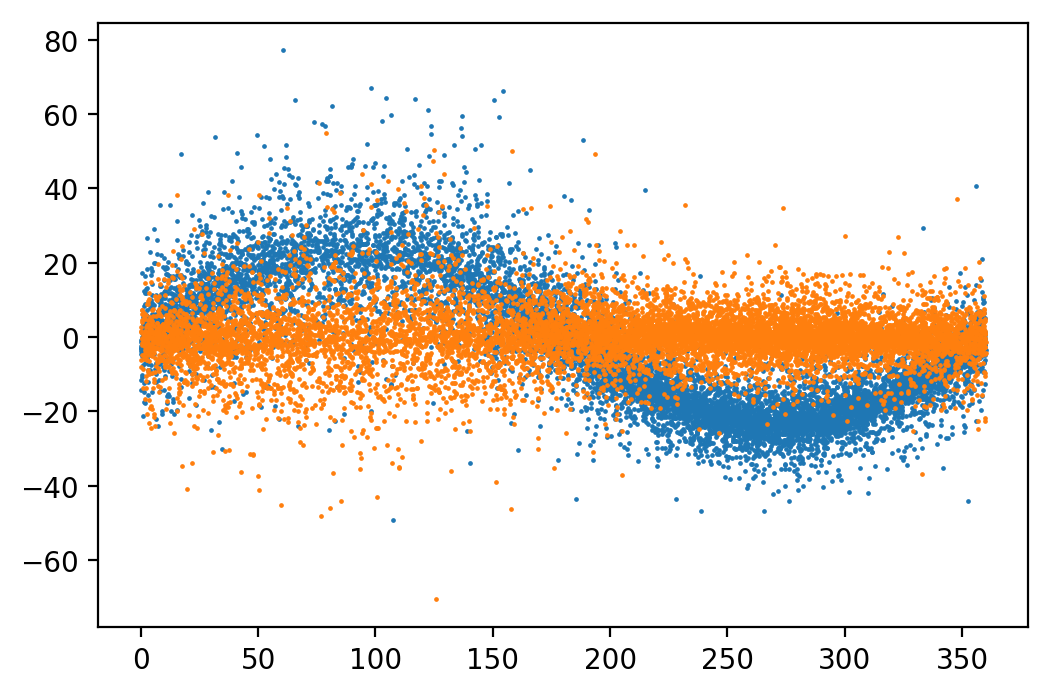

In [174]:
fig, ax = plt.subplots(1, 1, dpi=200)

ax.scatter(*coords_eq_ang_deg.T, s=0.5)
ax.scatter(*np.degrees(equatorialToEclipticAngular(np.radians(coords_eq_ang_deg))[:,0:2]).T, s=0.5)

In [175]:
c = SkyCoord(ra=coords_eq_ang_deg[:, 0]*u.degree, dec=coords_eq_ang_deg[:, 1]*u.degree, frame='gcrs')

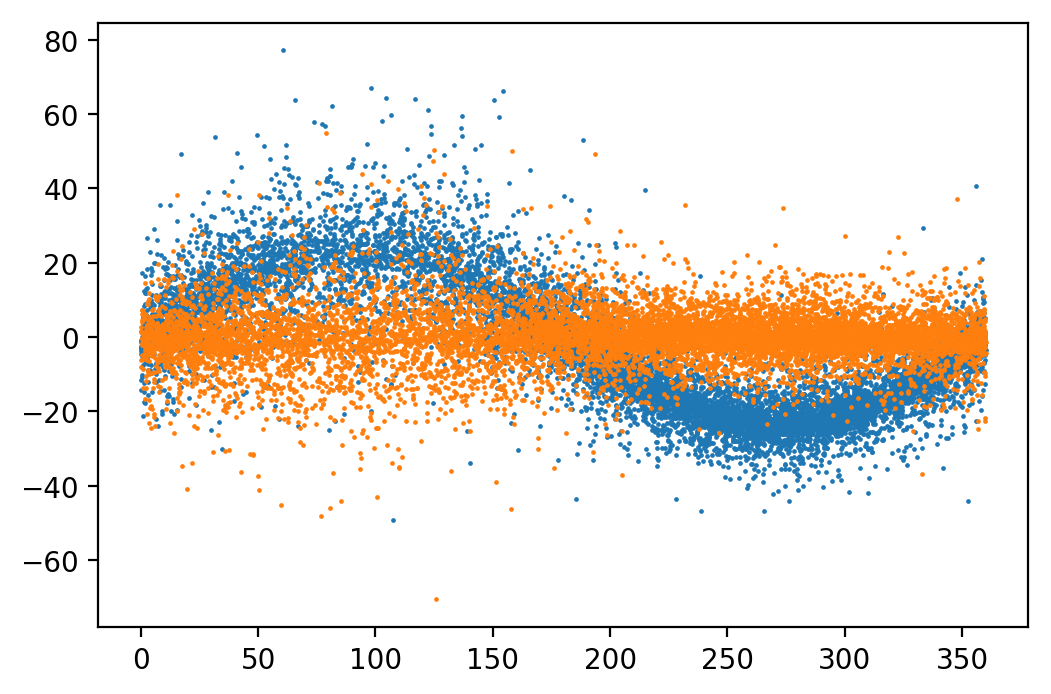

In [176]:
fig, ax = plt.subplots(1, 1, dpi=200)
ax.scatter(c.ra, c.dec, s=0.5)
ax.scatter(c.geocentrictrueecliptic.lon.value, c.geocentrictrueecliptic.lat.value, s=0.5)